# Description

TODO

# Modules loading

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from clustermatch import conf

# Settings

In [2]:
# ENRICH_FUNCTION = "enrichGO"

In [3]:
# CORRELATION_METHOD_NAME = "clustermatch"

In [4]:
# GENE_SELECTION_STRATEGY = "var_pc_log2"

In [5]:
# # clusterProfiler settings
# ENRICH_FUNCTION = "enrichGO"
# SIMPLIFY_CUTOFF = 0.7
# GO_ONTOLOGIES = ("BP", "CC", "MF")

In [6]:
# SIMILARITY_MATRICES_DIR = conf.GTEX["SIMILARITY_MATRICES_DIR"]
# display(SIMILARITY_MATRICES_DIR)

In [7]:
# SIMILARITY_MATRIX_FILENAME_TEMPLATE = conf.GTEX["SIMILARITY_MATRIX_FILENAME_TEMPLATE"]
# display(SIMILARITY_MATRIX_FILENAME_TEMPLATE)

# Paths

In [8]:
INPUT_FILE = conf.GTEX["GENE_ENRICHMENT_COMBINED_FILE"]
display(INPUT_FILE)
assert INPUT_FILE.exists()

PosixPath('/home/miltondp/projects/labs/greenelab/clustermatch_repos/clustermatch-gene-expr/base/results/gtex_v8/gene_set_enrichment/gtex_v8_data-gene_set_enrichment.pkl')

# Load data

In [9]:
df = pd.read_pickle(INPUT_FILE)

In [10]:
df.shape

(2505045, 19)

In [11]:
df.head()

,n_clusters,cluster_id,go_term_id,go_term_desc,gene_count,gene_total,gene_ratio,bg_count,bg_total,bg_ratio,fdr,tissue,gene_sel_strategy,corr_method,clust_method,enrich_func,results_subset,rich_factor,fold_enrich
0,2,C0,GO:0002443,leukocyte mediated immunity,182,523,0.347992,357,3528,0.101190,5.513573e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.509804,3.438983
1,2,C0,GO:0002250,adaptive immune response,153,523,0.292543,260,3528,0.073696,5.619467e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.588462,3.969584
2,2,C0,GO:0002252,immune effector process,210,523,0.401530,478,3528,0.135488,1.899014e-61,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.439331,2.963591
3,2,C0,GO:0050776,regulation of immune response,178,523,0.340344,372,3528,0.105442,2.790792e-57,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.478495,3.227780
4,2,C0,GO:0006909,phagocytosis,112,523,0.214149,171,3528,0.048469,3.019211e-52,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.654971,4.418235


# QQ plot

In [117]:
CLUSTERMATCH_METHOD = "clustermatch_k2"

In [118]:
PERFORMANCE_MEASURE = "rich_factor"

In [119]:
QUANTILES = np.linspace(0, 1, 10000)
display(QUANTILES[:10])
display(QUANTILES[-10:])

array([0.        , 0.00010001, 0.00020002, 0.00030003, 0.00040004,
       0.00050005, 0.00060006, 0.00070007, 0.00080008, 0.00090009])

array([0.99909991, 0.99919992, 0.99929993, 0.99939994, 0.99949995,
       0.99959996, 0.99969997, 0.99979998, 0.99989999, 1.        ])

In [120]:
df["results_subset"].unique()

['BP_full', 'BP_simplified_070', 'CC_full', 'CC_simplified_070', 'MF_full', 'MF_simplified_070']
Categories (6, object): ['BP_full', 'BP_simplified_070', 'CC_full', 'CC_simplified_070', 'MF_full', 'MF_simplified_070']

In [121]:
df_subset = df[
    (np.ones(df.shape[0]).astype(bool))
    & (df.tissue == "adipose_subcutaneous")
    & (df.gene_sel_strategy == "var_pc_log2")
    & (df.clust_method == "SpectralClustering")
    & (df.enrich_func == "enrichGO")
    & (df.results_subset.str.contains("_simplified_"))
]

In [122]:
df_subset.shape

(173589, 19)

In [123]:
df_subset.head()

,n_clusters,cluster_id,go_term_id,go_term_desc,gene_count,gene_total,gene_ratio,bg_count,bg_total,bg_ratio,fdr,tissue,gene_sel_strategy,corr_method,clust_method,enrich_func,results_subset,rich_factor,fold_enrich
50515,2,C0,GO:0002443,leukocyte mediated immunity,182,523,0.347992,357,3528,0.101190,5.513573e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_simplified_070,0.509804,3.438983
50516,2,C0,GO:0002250,adaptive immune response,153,523,0.292543,260,3528,0.073696,5.619467e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_simplified_070,0.588462,3.969584
50517,2,C0,GO:0050776,regulation of immune response,178,523,0.340344,372,3528,0.105442,2.790792e-57,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_simplified_070,0.478495,3.227780
50518,2,C0,GO:0006909,phagocytosis,112,523,0.214149,171,3528,0.048469,3.019211e-52,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_simplified_070,0.654971,4.418235
50519,2,C0,GO:0002429,immune response-activating cell surface recept...,116,523,0.221797,187,3528,0.053005,1.120564e-50,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_simplified_070,0.620321,4.184497


In [124]:
df_methods = df_subset["corr_method"].unique()
display(df_methods)

['clustermatch', 'clustermatch_k2', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']
Categories (6, object): ['clustermatch', 'clustermatch_k2', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']

In [125]:
results_per_method = {}

for m in df_methods:
    df_values = df_subset[df_subset.corr_method == m][PERFORMANCE_MEASURE]
    display(f"{m} - {df_values.shape[0]}")

    if PERFORMANCE_MEASURE == "fdr":
        df_values = -np.log10(df_values)

    results_per_method[m] = df_values.quantile(QUANTILES).to_numpy()

'clustermatch - 27685'

'clustermatch_k2 - 22771'

'pearson_abs - 31490'

'pearson_full - 31475'

'spearman_abs - 28067'

'spearman_full - 32101'

In [126]:
quantiles_df = pd.DataFrame(results_per_method)

In [127]:
quantiles_df.shape

(10000, 6)

In [128]:
quantiles_df.head()

,clustermatch,clustermatch_k2,pearson_abs,pearson_full,spearman_abs,spearman_full
0,0.004000,0.004000,0.004000,0.004082,0.004000,0.004000
1,0.004424,0.004000,0.004000,0.004210,0.004143,0.004357
2,0.004619,0.004000,0.004184,0.004548,0.004411,0.004749
3,0.004619,0.004068,0.004444,0.004796,0.004577,0.004796
4,0.004744,0.004158,0.004796,0.004796,0.004619,0.004819


In [129]:
quantiles_df.describe()

,clustermatch,clustermatch_k2,pearson_abs,pearson_full,spearman_abs,spearman_full
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.159777,0.160448,0.147521,0.145292,0.161116,0.152760
std,0.152466,0.181672,0.145738,0.133873,0.151847,0.140717
min,0.004000,0.004000,0.004000,0.004082,0.004000,0.004000
25%,0.056572,0.041667,0.048117,0.054274,0.059701,0.058519
50%,0.111111,0.093023,0.100000,0.102190,0.111111,0.107602
75%,0.212121,0.205882,0.200000,0.190476,0.214286,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Gene Ontology (rich_factor)')

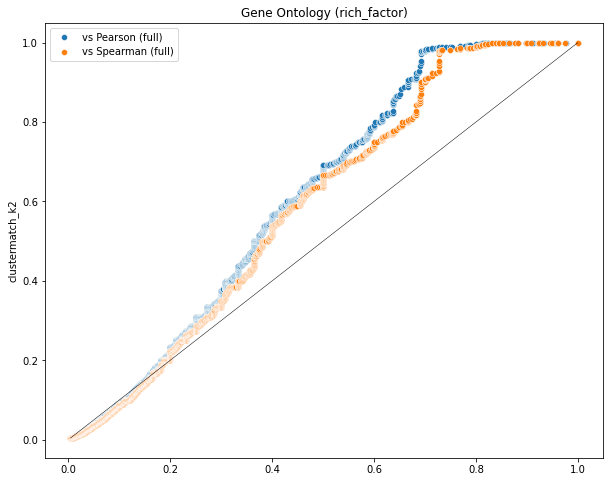

In [130]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson_full",
    y=CLUSTERMATCH_METHOD,
    label="vs Pearson (full)",
    ax=ax,
)

sns.scatterplot(
    data=quantiles_df,
    x="spearman_full",
    y=CLUSTERMATCH_METHOD,
    label="vs Spearman (full)",
    ax=ax,
)

ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")

Text(0.5, 1.0, 'Gene Ontology (rich_factor)')

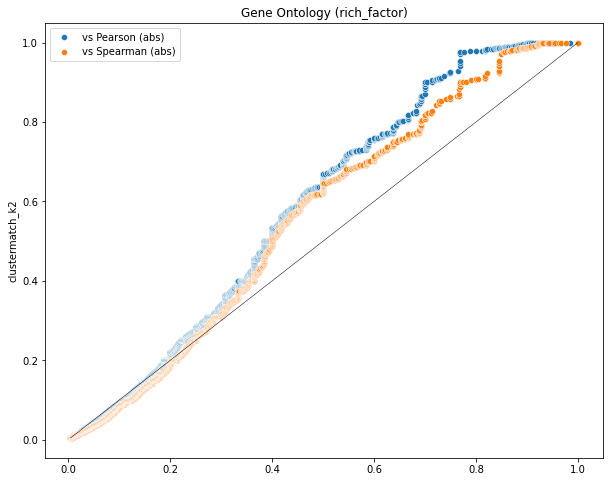

In [131]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson_abs",
    y=CLUSTERMATCH_METHOD,
    label="vs Pearson (abs)",
    ax=ax,
)

sns.scatterplot(
    data=quantiles_df,
    x="spearman_abs",
    y=CLUSTERMATCH_METHOD,
    label="vs Spearman (abs)",
    ax=ax,
)

ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")

Clustermatch (multi pattern) outperforms pearson (linear and abs), although pearson find most significant associations towards the
right end of the distribution.

However, Clustermatch does not outperform spearman (monotonic and abs), which provides more significant results across the entire distribution.